# import necessary libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')


# reading the dataset

# TASK 1

In [5]:

project_df=pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv',sep=";")
project_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


# replacing the blank spaces with _

In [7]:
project_df.columns=project_df.columns.str.replace(' ','_')
project_df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


# understanding the data

In [9]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [10]:
project_df.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [11]:
project_df.shape

(740, 21)

In [12]:
project_df.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [13]:
project_df.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

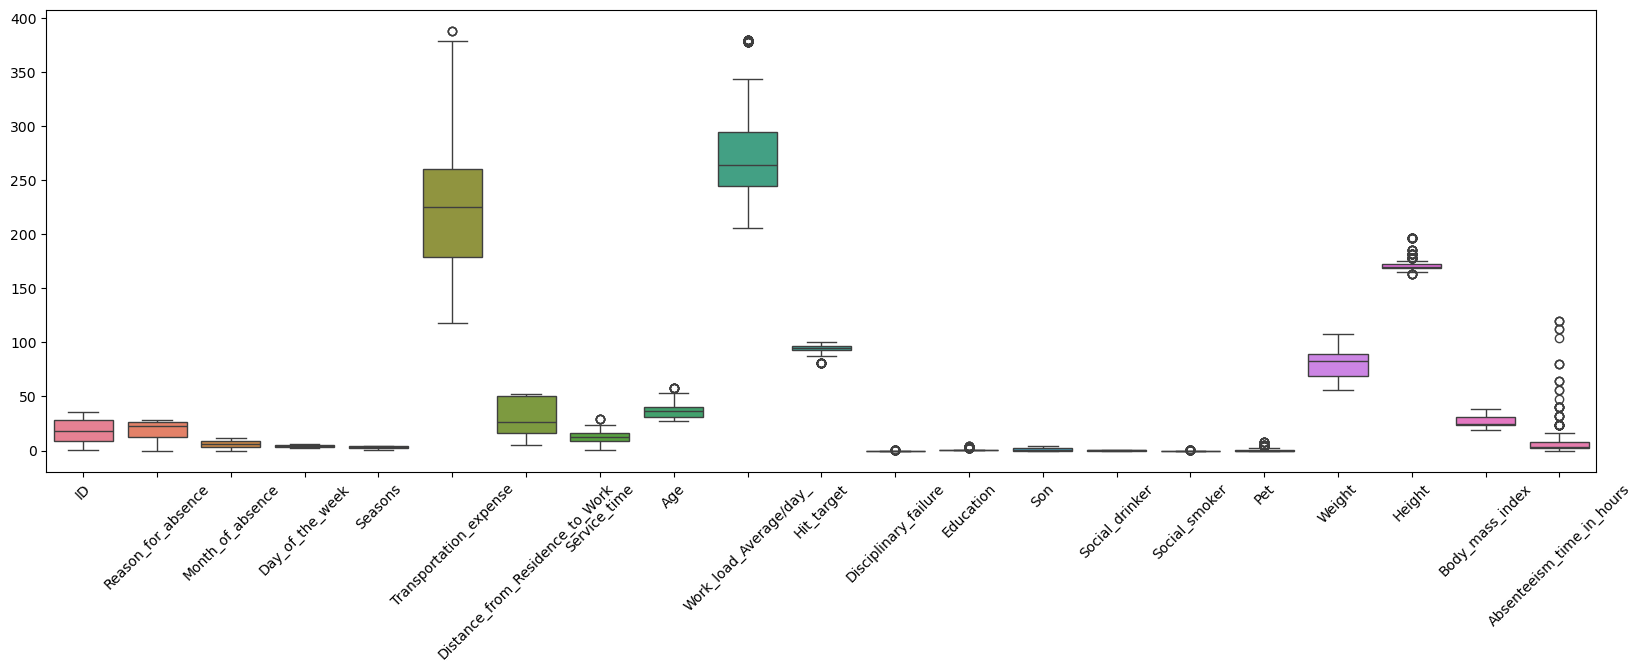

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Outlier analysis
sns.boxplot(data=project_df)
plt.gcf().set_size_inches(20,6) 
plt.xticks(rotation=45) 
plt.show()


# CONVERSION OF NUMERICAL COLUMNS TO CATEGORICAL FOR VISUALISATION

In [16]:
project_df['Reason_for_absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [17]:
# reason for absence
threshold=[14,17,21]
bins=['group1','group2','group3','group4']
def assign_reason(val):
    if val<=threshold[0]:
        return bins[0]
    elif val<=threshold[1]:
        return bins[1]
    elif val<=threshold[2]:
        return bins[2]
    else:
        return bins[3]

In [18]:
project_df['Reason_for_absence_c']=project_df['Reason_for_absence'].apply(assign_reason)

In [19]:
# day of the week
bn2=[0,1,2,3,4,5,6,7]
lbl2=['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
project_df['Day_of_the_week_c']=pd.cut(project_df['Day_of_the_week'],bins=bn2,labels=lbl2)

In [20]:
# seasons
bn1=[0,1,2,3,4]
lbl1=['summer','winter','autumn','spring']
project_df['Seasons_c']=pd.cut(project_df['Seasons'],bins=bn1,labels=lbl1)

In [21]:
#age
threshold=[30,35,40,45,50,55]
labels=['25 to 30','30 to 35','35 to 40','40 to 45','45 to 50','50 to 55','55 to 60']
def label_assign(values):
    if values<=threshold[0]:
        return labels[0]
    elif values<=threshold[1]:
        return labels[1]
    elif values<=threshold[2]:
        return labels[2]
    elif values<=threshold[3]:
        return labels[3]
    elif values<=threshold[4]:
        return labels[4]
    elif values<=threshold[5]:
        return labels[5]
    else:
        return labels[6]

In [22]:
project_df['Absenteeism_time_in_hours_c']=np.where(project_df['Absenteeism_time_in_hours']>project_df['Absenteeism_time_in_hours'].mean(),'high_absent','lower_adsent')

In [23]:
project_df['Age_c']=project_df['Age'].apply(label_assign)

In [24]:
# hit target
project_df['Hit_target_c']=np.where(project_df['Hit_target']>project_df['Hit_target'].median(),'not reached','reached')

In [25]:
#'Disciplinary_failure_c'
bn3=[-1,0,1]
lbl3=['no disciplanary action','action taken']
project_df['Disciplinary_failure_c']=pd.cut(project_df['Disciplinary_failure'],bins=bn3,labels=lbl3)

In [26]:
# education
bn4=[0,1,2,3,4]
lbl4=['high school','graduate','post grad','Doctor / Masters']
project_df['Education_c']=pd.cut(project_df['Education'],bins=bn4,labels=lbl4)

In [27]:
project_df['Social_drinker'].unique()

array([1, 0], dtype=int64)

In [28]:
# social drinker

bn6=[-1,0,1]
lbl6=['not a drinker','social drinker']
project_df['Social_drinker_c']=pd.cut(project_df['Social_drinker'],bins=bn6,labels=lbl6)

In [29]:
# social smoker
bn7=[-1,0,1]
lbl7=['Not a smoker','smoker']
project_df['Social_smoker_c']=pd.cut(project_df['Social_smoker'],bins=bn7,labels=lbl7)

In [30]:
bn7=[-1,0,1]
lbl7=['Not a smoker','smoker']
project_df['Social_smoker_c']=pd.cut(project_df['Social_smoker'],bins=bn7,labels=lbl7)

In [31]:
# Absenteeism_time_in_hours_c
project_df['Absenteeism_time_in_hours_c']=np.where(project_df['Absenteeism_time_in_hours']>project_df['Absenteeism_time_in_hours'].mean(),'high-absent','low-absent')

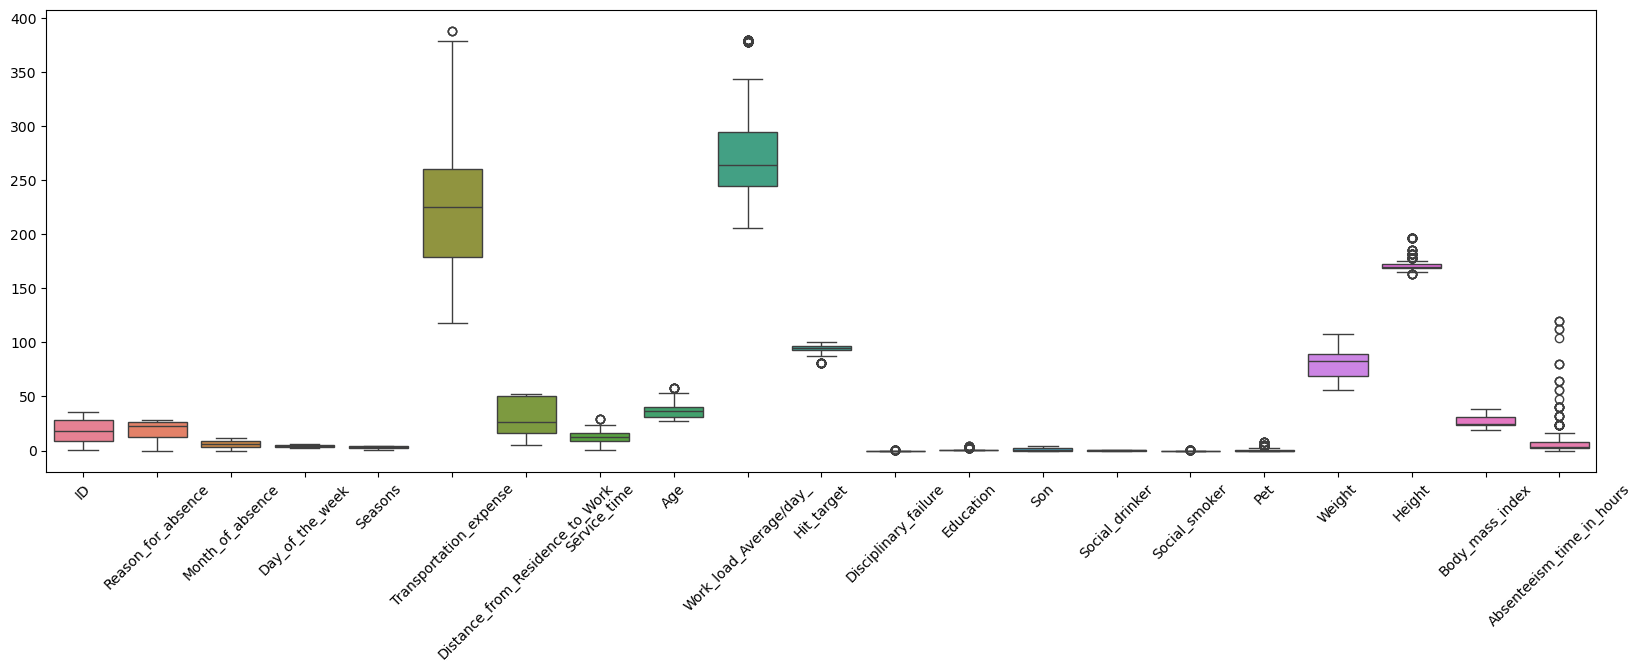

In [32]:
sns.boxplot(data=project_df)
plt.gcf().set_size_inches(20,6) #gcf(): get current figure size
plt.xticks(rotation=45) #tilts the xlabel
plt.show()

# task 2

In [34]:
project_df.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'Reason_for_absence_c',
       'Day_of_the_week_c', 'Seasons_c', 'Absenteeism_time_in_hours_c',
       'Age_c', 'Hit_target_c', 'Disciplinary_failure_c', 'Education_c',
       'Social_drinker_c', 'Social_smoker_c'],
      dtype='object')

<Axes: xlabel='Age_c'>

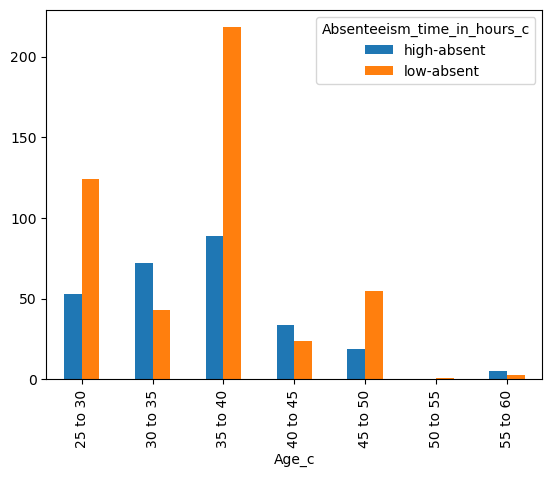

In [35]:
pd.crosstab(project_df['Age_c'],project_df['Absenteeism_time_in_hours_c']).plot(kind='bar')

<Axes: xlabel='Education_c'>

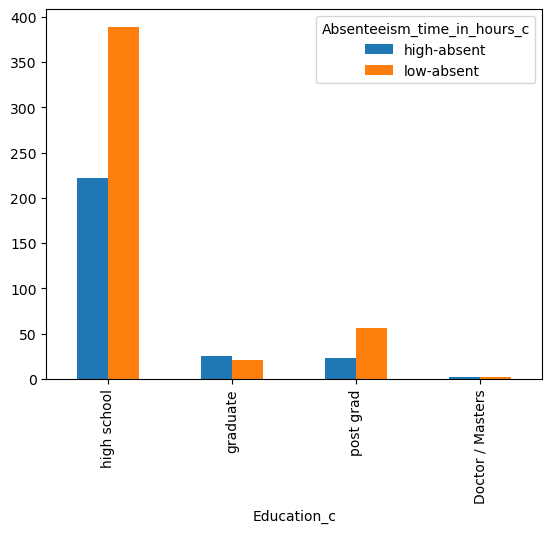

In [36]:
pd.crosstab(project_df["Education_c"],project_df["Absenteeism_time_in_hours_c"]).plot(kind="bar")

<Axes: xlabel='Seasons'>

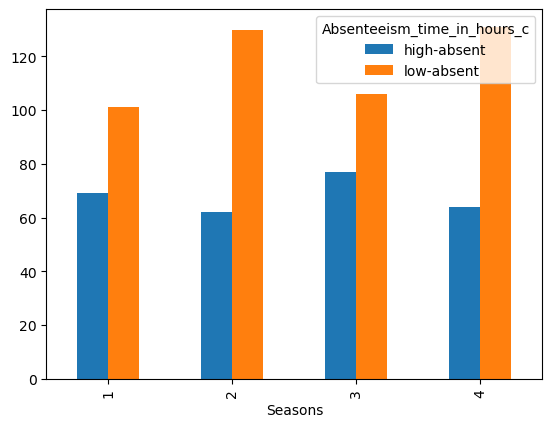

In [37]:
pd.crosstab(project_df["Seasons"],project_df["Absenteeism_time_in_hours_c"]).plot(kind="bar")

<Axes: xlabel='Reason_for_absence_c'>

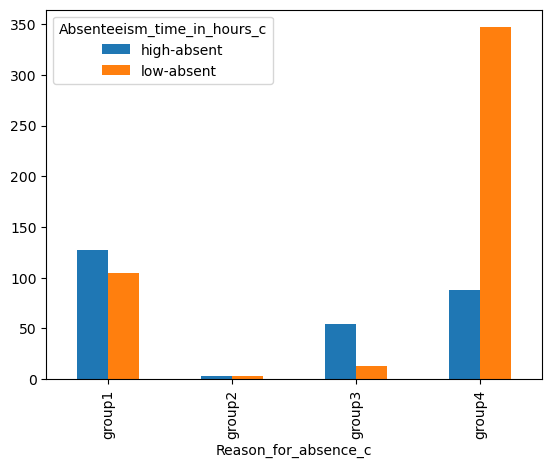

In [38]:
pd.crosstab(project_df["Reason_for_absence_c"],project_df["Absenteeism_time_in_hours_c"]).plot(kind="bar")

<Axes: xlabel='Reason_for_absence_c'>

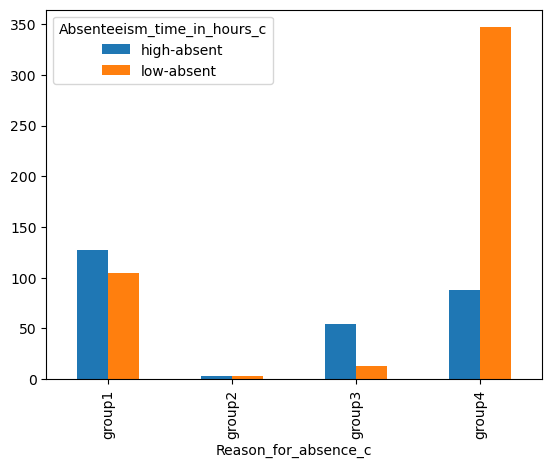

In [39]:
pd.crosstab(project_df["Reason_for_absence_c"],project_df["Absenteeism_time_in_hours_c"]).plot(kind="bar")

<Axes: xlabel='Disciplinary_failure_c'>

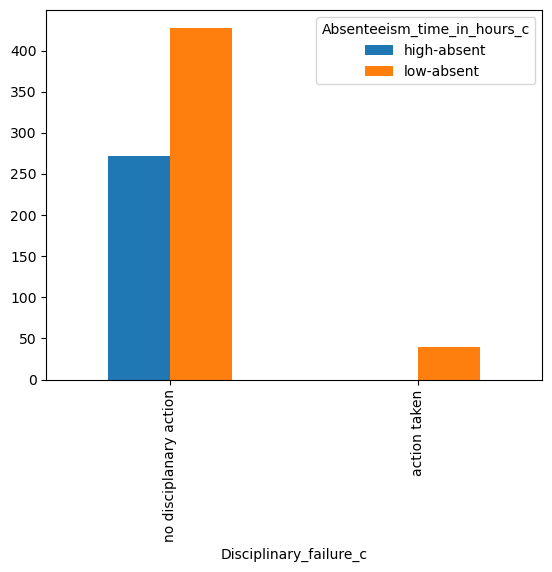

In [40]:
pd.crosstab(project_df["Disciplinary_failure_c"],project_df["Absenteeism_time_in_hours_c"]).plot(kind="bar")

<Axes: xlabel='Hit_target_c'>

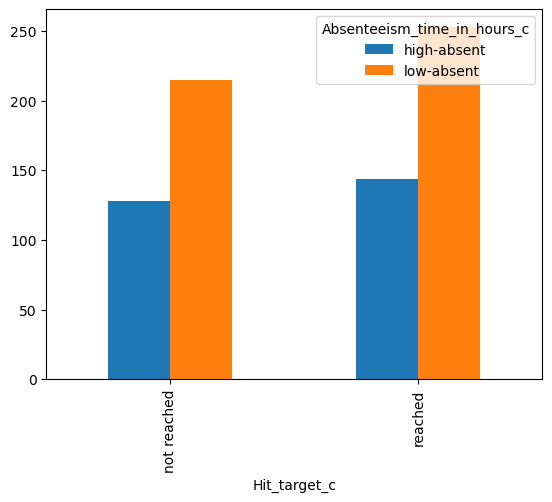

In [41]:
pd.crosstab(project_df["Hit_target_c"],project_df["Absenteeism_time_in_hours_c"]).plot(kind="bar")

In [42]:
new_df=project_df.select_dtypes(exclude=["object","category"])
new_df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


<function matplotlib.pyplot.show(close=None, block=None)>

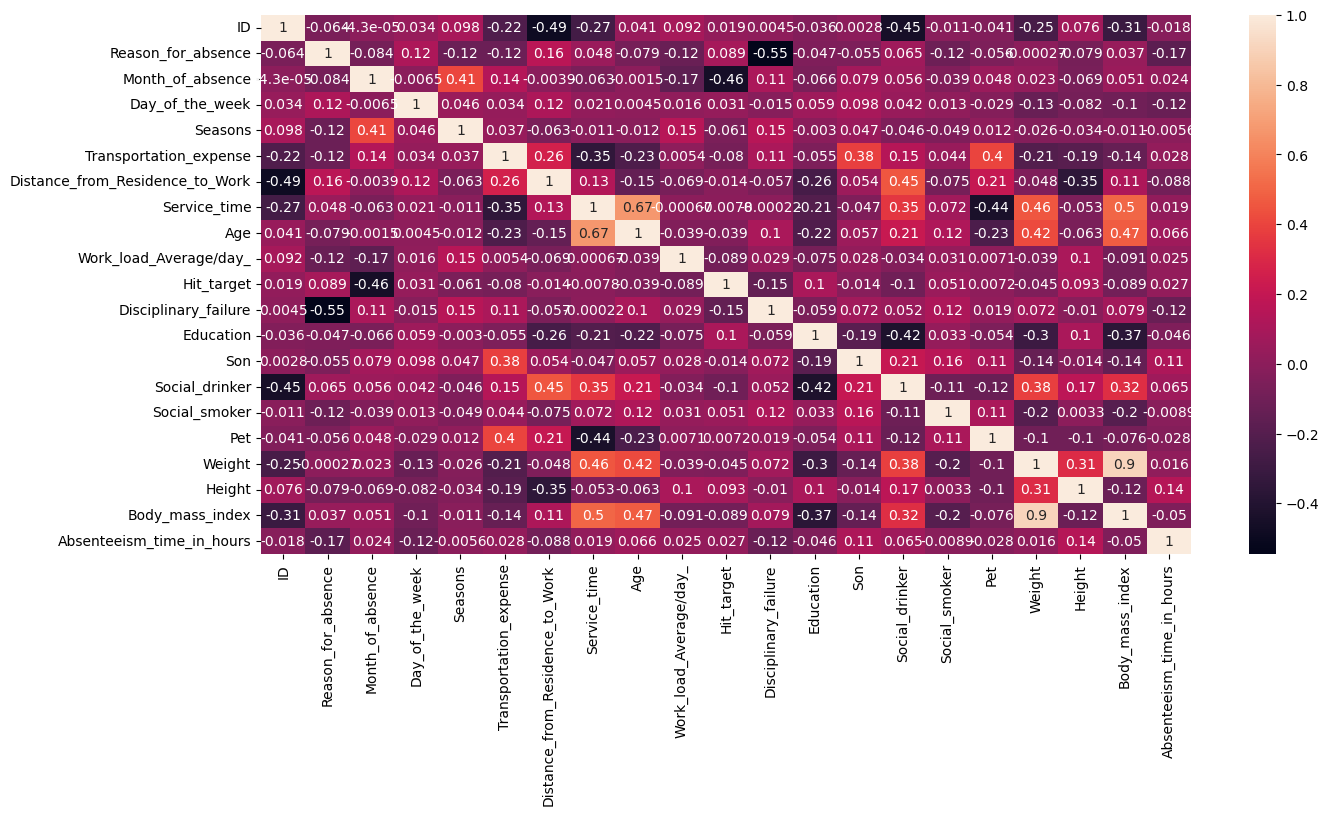

In [43]:

sns.heatmap(new_df.corr(),annot=True)
plt.gcf().set_size_inches(15,7)
plt.show

# TASK 3

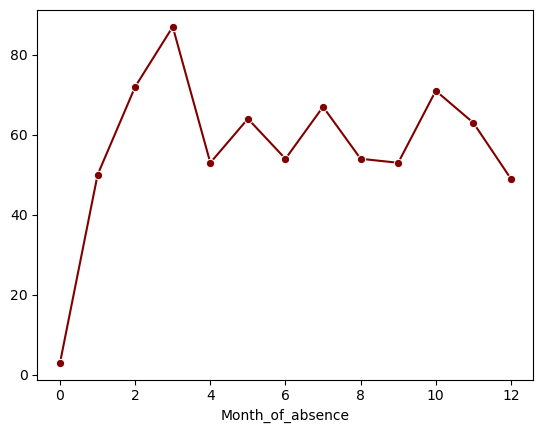

In [45]:
month_counts = project_df['Month_of_absence'].value_counts()
sns.lineplot(x=month_counts.index,y=month_counts.values,marker='o',c='maroon')
plt.show()

Reason_for_absence
23    149
28    112
27     69
13     55
0      43
Name: count, dtype: int64


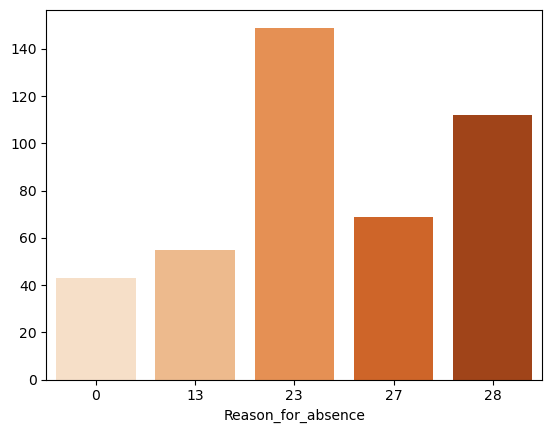

In [46]:
reason_count = project_df['Reason_for_absence'].value_counts()
print(reason_count[:5])
sns.barplot(x=reason_count.index[:5],y=reason_count.values[:5],palette='Oranges')
plt.show()

# task 4

In [48]:
cols=new_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(new_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)

df_scaled

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767


 # MODEL1:

In [50]:
# training the data
X=np.array(df_scaled['Reason_for_absence']).reshape(-1,1)
y=np.array(df_scaled['Absenteeism_time_in_hours'])

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=200)

In [52]:
s_model=LinearRegression().fit(xtrain,ytrain)
s_model

LinearRegression()

In [53]:
# finding intercept and slope 
print('intercept:',s_model.intercept_)
print('slope:',s_model.coef_)

intercept: 0.003808725490963452
slope: [-0.19747589]


In [54]:
# prediction
y_predict=s_model.predict(xtest)


In [55]:
# mae , mse,rmse
MSE=mean_squared_error(ytest,y_predict)
MAE=mean_absolute_error(ytest,y_predict)
RMSE=np.sqrt(mean_squared_error(ytest,y_predict))
R2score=r2_score(ytest,y_predict)


print('MSE:',MSE)
print('MAE:',MAE)
print('RMSE:',RMSE)
print('R2score:',R2score)

MSE: 0.9017211871787671
MAE: 0.44923248904232144
RMSE: 0.9495900100457919
R2score: 0.008304217032900296


# model 2

In [57]:
df_scaled.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [58]:
X1=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure']]).reshape(-1,2)
y1=np.array(df_scaled['Absenteeism_time_in_hours'])
    

In [59]:
from sklearn.model_selection import train_test_split

# Assuming X1 and y1 are your features and target variables
Xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X1, y1, test_size=0.3, random_state=200)


In [60]:
#building model
s1_model=LinearRegression().fit(Xtrain1,ytrain1)

In [61]:
print("Intercept",s_model.intercept_)
print("Slope",s1_model.coef_)

Intercept 0.003808725490963452
Slope [-0.36457627 -0.32366738]


In [62]:
y_pred1=s1_model.predict(xtest1)

In [63]:
MSE1= mean_squared_error(ytest1,y_pred1)
print('MSE:',MSE1)
MAE1= mean_absolute_error(ytest1,y_pred1)
print('MAE:',MAE1)
RMSE1= np.sqrt(mean_squared_error(ytest1,y_pred1))
print('RMSE:',RMSE1)
R2_1=r2_score(ytest1,y_pred1)
print('R2:',R2_1)

MSE: 0.8374884639859759
MAE: 0.41881283341299236
RMSE: 0.9151439580666945
R2: 0.07894614230259633


# model 3

In [65]:
df_scaled.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [66]:
# spiliting data
X2=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work']]).reshape(-1,3)
y2=np.array(df_scaled['Absenteeism_time_in_hours'])

In [67]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X2,y2,test_size=0.3,random_state=200)


In [68]:
# building model
s2_model=LinearRegression().fit(xtrain2,ytrain2)

In [69]:
print("Intercept",s2_model.intercept_)
print("Slope",s2_model.coef_)

Intercept 0.0023509806700930357
Slope [-0.35458188 -0.32140908 -0.04697836]


In [70]:
y_pred2=s2_model.predict(xtest2)

In [71]:
MSE2= mean_squared_error(ytest2,y_pred2)
print('MSE:',MSE2)
MAE2= mean_absolute_error(ytest2,y_pred2)
print('MAE:',MAE2)
RMSE2= np.sqrt( mean_squared_error(ytest2,y_pred2))
print('RMSE:',RMSE2)
R2_2=r2_score(ytest2,y_pred2)
print('R2:',R2_2)

MSE: 0.8336453722496637
MAE: 0.42469467194575694
RMSE: 0.9130418239323234
R2: 0.08317270137944432


In [72]:
# spilting data

X3=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index']]).reshape(-1,4)
y3=np.array(df_scaled['Absenteeism_time_in_hours'])



In [73]:

xtrain3,xtest3,ytrain3,ytest3=train_test_split(X3,y3,test_size=0.3,random_state=200)


In [74]:
#building model
s3_model=LinearRegression().fit(xtrain3,ytrain3)

In [75]:
# 
print("Intercept",s3_model.intercept_)
print("Slope",s3_model.coef_)

Intercept 0.0013883677556578691
Slope [-0.35315395 -0.31992773 -0.04426921 -0.02422888]


In [76]:
# predicting
y_pred3=s3_model.predict(xtest3)


In [77]:
MSE2= mean_squared_error(ytest3,y_pred3)
print('MSE:',MSE2)
MAE2= mean_absolute_error(ytest3,y_pred3)
print('MAE:',MAE2)
RMSE2= np.sqrt( mean_squared_error(ytest3,y_pred3))
print('RMSE:',RMSE2)
R2_2=r2_score(ytest3,y_pred3)
print('R2:',R2_2)

MSE: 0.8357539508256799
MAE: 0.4257771931718587
RMSE: 0.9141957945788637
R2: 0.08085372683207626


In [78]:
def calculating_residuals(model,features,label):
    Predictions=model.predict(features)
    df_results=pd.DataFrame({"Actual":label,"Predictions":Predictions})
    df_results["Residuals"]=abs(df_results["Actual"])-abs(df_results["Predictions"])
    return df_results
def Linear_regression(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color="red",linestyle="--")
    plt.title("Linear Regression plot")

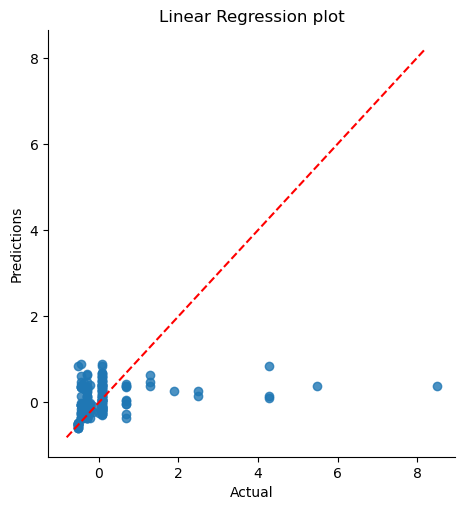

In [79]:
Linear_regression(s2_model,xtest2,ytest2)

In [80]:
def homoscadecity_assumption(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    plt.subplots(figsize=(7,5))
    ax=plt.subplot(111)
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="red",linestyle="--")
    plt.gca().set_facecolor("pink")
    plt.title("Linear_ Assumption Plot")
    plt.xlabel("Index value")
    plt.ylabel("Residual value")
    plt.show()

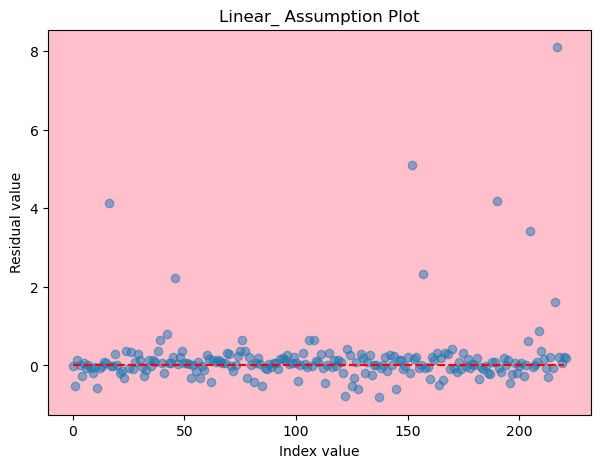

In [81]:
homoscadecity_assumption(s2_model,xtest2,ytest2)

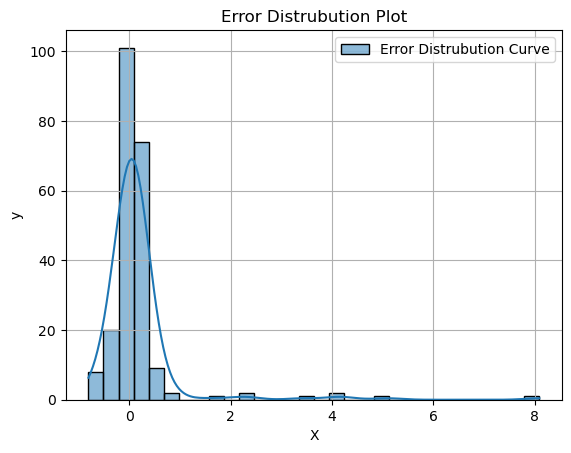

In [82]:
df_results=calculating_residuals(s2_model,xtest2,ytest2)
sns.histplot(df_results.Residuals,bins=30,label="Error Distrubution Curve",kde=True)
plt.title("Error Distrubution Plot")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# PROJECT 2

# TASK 1

In [173]:
#Task1:
project_df['Absenteeism_time_in_hours_c']=project_df['Absenteeism_time_in_hours_c'].replace({'high-absent':1,'low-absent':0})
project_df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Reason_for_absence_c,Day_of_the_week_c,Seasons_c,Absenteeism_time_in_hours_c,Age_c,Hit_target_c,Disciplinary_failure_c,Education_c,Social_drinker_c,Social_smoker_c
0,11,26,7,3,1,289,36,13,33,239.554,...,group4,tuesday,summer,0,30 to 35,not reached,no disciplanary action,high school,social drinker,Not a smoker
1,36,0,7,3,1,118,13,18,50,239.554,...,group1,tuesday,summer,0,45 to 50,not reached,action taken,high school,social drinker,Not a smoker
2,3,23,7,4,1,179,51,18,38,239.554,...,group4,wednesday,summer,0,35 to 40,not reached,no disciplanary action,high school,social drinker,Not a smoker
3,7,7,7,5,1,279,5,14,39,239.554,...,group1,thursday,summer,0,35 to 40,not reached,no disciplanary action,high school,social drinker,smoker
4,11,23,7,5,1,289,36,13,33,239.554,...,group4,thursday,summer,0,30 to 35,not reached,no disciplanary action,high school,social drinker,Not a smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,group1,tuesday,summer,1,30 to 35,reached,no disciplanary action,high school,social drinker,Not a smoker
736,1,11,7,3,1,235,11,14,37,264.604,...,group1,tuesday,summer,0,35 to 40,reached,no disciplanary action,post grad,not a drinker,Not a smoker
737,4,0,0,3,1,118,14,13,40,271.219,...,group1,tuesday,summer,0,35 to 40,reached,no disciplanary action,high school,social drinker,Not a smoker
738,8,0,0,4,2,231,35,14,39,271.219,...,group1,wednesday,winter,0,35 to 40,reached,no disciplanary action,high school,social drinker,Not a smoker


In [175]:
df_1=project_df[['Absenteeism_time_in_hours_c']]
df_1

,Absenteeism_time_in_hours_c
0,0
1,0
2,0
3,0
4,0
...,...
735,1
736,0
737,0
738,0


In [177]:
df_new=pd.concat([df_scaled,df_1],axis=1)
df_new

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Absenteeism_time_in_hours_c
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511,0
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767,0
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639,0
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511,0
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744,1
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511,0
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767,0
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767,0


In [179]:
df_new=df_new.drop(['Weight','Absenteeism_time_in_hours'],axis=1)
df_new

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Height,Body_mass_index,Absenteeism_time_in_hours_c
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,0
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,0.975828,1.009438,0
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,-0.350671,1.009438,0
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.682295,-0.625100,0
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,-0.019046,0.775932,1
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,-0.019046,0.542427,0
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,-0.350671,1.709954,0
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,-0.350671,1.943459,0


In [200]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,roc_auc_score,RocCurveDisplay

In [202]:
absence_train,absence_test=train_test_split(df_new,test_size=0.2,random_state=0)

In [210]:
x_train=absence_train.drop(columns='Absenteeism_time_in_hours_c',axis=1)
y_train=absence_train['Absenteeism_time_in_hours_c']
x_test=absence_test.drop(columns='Absenteeism_time_in_hours_c',axis=1)
y_test=absence_test['Absenteeism_time_in_hours_c']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(592, 19)
(592,)
(148, 19)
(148,)


In [212]:
logreg=LogisticRegression().fit(x_train,y_train)

y_pred=logreg.predict(x_test)

In [214]:
print(confusion_matrix(y_test,y_pred))

tn,fp,tp,fn=confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,tp,fn)

[[76  9]
 [21 42]]
76 9 21 42


In [216]:
# ROC score
print('recall_score:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))

recall_score: 0.6666666666666666
f1_score: 0.7368421052631579
accuracy_score: 0.7972972972972973
precision_score: 0.8235294117647058


In [218]:
roc_auc=roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])
roc_auc

0.8534080298786181

<Figure size 1500x800 with 0 Axes>

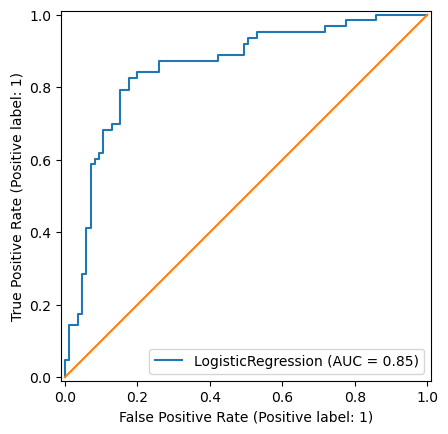

In [220]:
plt.gcf().set_size_inches(15,8)
RocCurveDisplay.from_estimator(logreg,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()